In [118]:
import sys
sys.path.append('../')
from GMM.gmm2 import GMM
import numpy as np
import scipy.linalg as lin

In [119]:
mod1 = GMM( nz=3, nx=5, prior_z = [0.8,0.15,0.05] )
mod1.mu_x[:,1]=[0.2,1,-1]
mod1.mu_x[2,:]=[0.9,3,1,3,-1]
mod1.mu_x[0,:]=[-1,-.2,.3,-2,1]

for kk in [1,2]:
    v = np.random.randn(mod1.nx,mod1.nx)
    v = v/lin.norm(v,axis=0)
    e = np.random.rand(mod1.nx)*1.5
    mod1.sigma_x[kk] = v @ np.diag(e) @ v.T

In [120]:
mod2 = GMM(nz=mod1.nz, nx=mod1.nx, prior_z=[0.2,0.3,0.5])


In [121]:
T = 1000
Z, X = mod1.sample(T=T)

In [122]:
#ll0 = mod2.get_ll(X)
gm = mod2.e_step(X)
#mod2.m_step(X,gm)
#ll1 = mod2.get_ll(X)

In [123]:
logL = mod2.fit_params(X, n_steps=0,tol=0.03)

In [124]:
mod2.prior_z
states_order=np.argsort(1/mod2.prior_z)
mod2.prior_z[states_order]

array([0.79147942, 0.15452058, 0.054     ])

In [125]:
import matplotlib.pyplot as pp

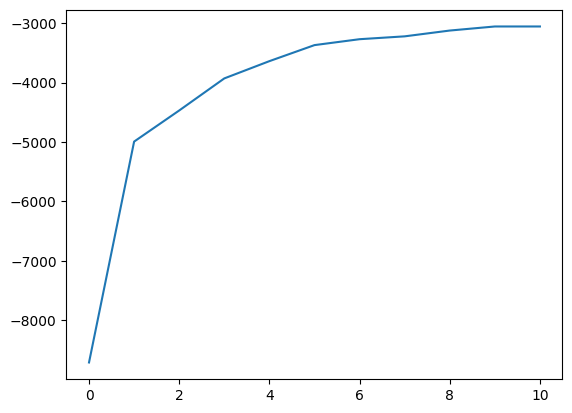

In [126]:
pp.plot(logL)

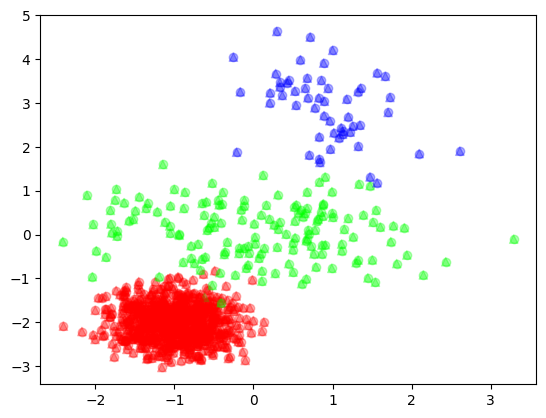

In [127]:
gm = mod2.e_step(X)

xx=0
yy=3
for kk in range(mod2.nz):
    use_t = np.where(Z==kk)[0]
    c=[0,0,0]
    c[kk]=1
    pp.scatter(X[use_t,xx],X[use_t,yy], color=c, alpha=0.3 )
    pp.scatter(X[use_t,xx], X[use_t,yy], marker='^', c=gm[np.ix_(use_t,states_order)], alpha=0.3)



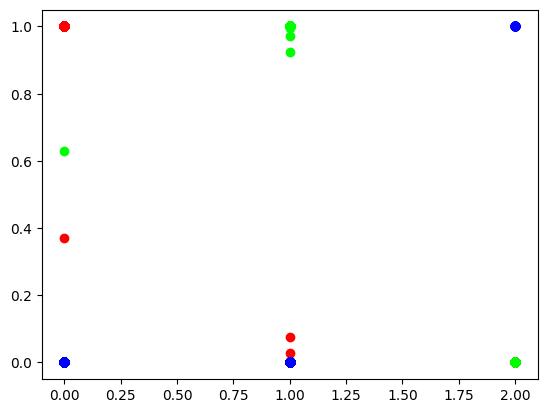

In [128]:
for kk in range(mod1.nz):
    cc=[0,0,0]
    cc[kk]=1
    pp.scatter(Z,gm[:,states_order[kk]],color=cc)

In [129]:
np.nanmedian(mod1.sigma_x-mod2.sigma_x[states_order,:])

0.0029565141223493463

In [130]:
idx=0
mod1.sigma_x[idx] - np.int_(mod2.sigma_x[states_order[idx]]*100)/100

array([[ 0.0083952,  0.01     ,  0.       ,  0.       ,  0.       ],
       [ 0.01     ,  0.0183952,  0.       ,  0.       ,  0.       ],
       [ 0.       ,  0.       , -0.0016048,  0.       ,  0.       ],
       [ 0.       ,  0.       ,  0.       ,  0.0083952,  0.       ],
       [ 0.       ,  0.       ,  0.       ,  0.       , -0.0016048]])